In [1]:
import regex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from datetime import date
import datetime as dt

In [2]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [3]:

data = []
conversation = 'Northwest_Calabar.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [5]:


df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}
df['Day'] = df['Date'].dt.weekday.map(weeks)

C:\Users\User\AppData\Local\Temp\ipykernel_12868\1883620404.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
df = df[['Date','Day','Time','Author','Message']]

In [27]:
df['Media'] = df['Message']=='<Media omitted>'

In [28]:
df = df[['Date','Day','Time','Author','Message','Media']]

In [29]:
df.head()

,Date,Day,Time,Author,Message,Media
0,2021-05-24,Monday,14:26,None,You were added,False
1,2021-11-09,Tuesday,07:22,Labaran,<Media omitted>,True
2,2021-11-09,Tuesday,08:35,David Electrical,<Media omitted>,True
3,2021-09-13,Monday,00:11,Labaran,<Media omitted>,True
4,2021-09-14,Tuesday,09:39,Attoe NW,Happy birthday @2347037631546,False


In [47]:
total_messages = df.shape[0]
total_media = df[df['Message'] == '<Media omitted>'].shape[0]
Authors= df.Author.unique()
Number_of_Authors = Authors.shape[0]

In [52]:
print('Number of Authors:{}'.format(Number_of_Authors))
print('Number of Messages:{}'.format(total_messages))
print('Number of Media Sent:{}'.format(total_media))

Number of Authors:57
Number of Messages:4675
Number of Media Sent:1217


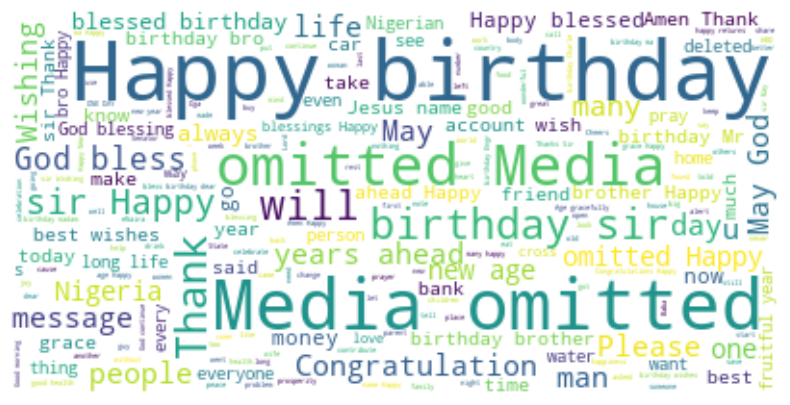

In [56]:
text = " ".join(review for review in df.Message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:


l = df.Author.unique()
for i in range(len(l)):
   req_df = df[df["Author"] == l[i]]
    print(l[i],'  ->  ',req_df.shape[0])
l = df.Day.unique()
for i in range(len(l)):
   req_df = df[df["Day"] == l[i]]
   print(l[i],'  ->  ',req_df.shape[0])plt.figure(figsize=(9,6))
mostly_active = df['Author'].value_counts()
m_a = mostly_active.head(10)

IndentationError: unexpected indent (1954142293.py, line 4)

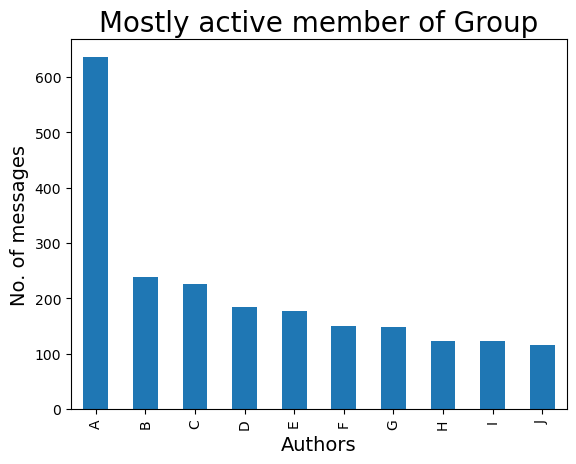

In [65]:
bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))
m_a.plot.bar()
plt.xlabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of Group',fontdict={'fontsize': 20,'fontweight': 8})
plt.xticks(x_pos, bars)
plt.show()

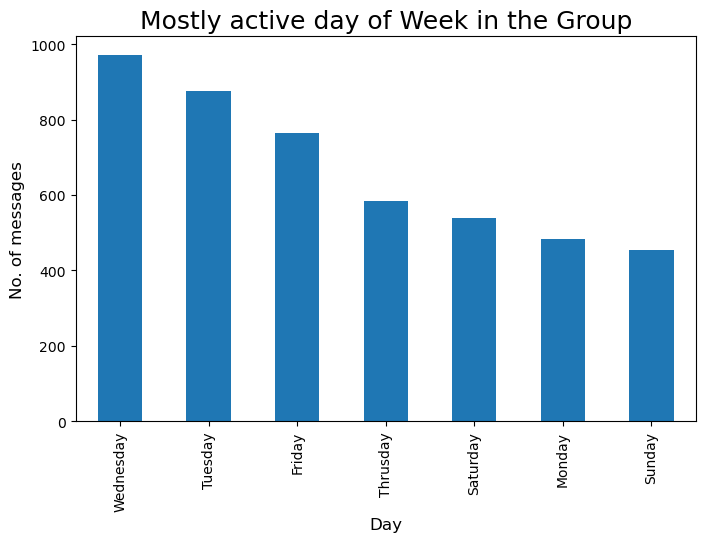

In [66]:
plt.figure(figsize=(8,5))
active_day = df['Day'].value_counts() 
a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of Week in the Group',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

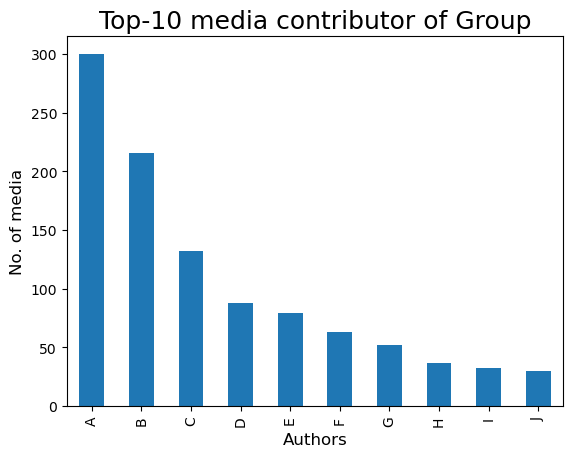

In [70]:
mm = df[df['Message'] == '<Media omitted>']
mm1 = mm['Author'].value_counts()
bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))
top10 = mm1.head(10)
top10.plot.bar()
plt.xlabel('Authors',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of media',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Top-10 media contributor of Group',fontdict={'fontsize': 18,'fontweight': 8})
plt.xticks(x_pos, bars)
plt.show()

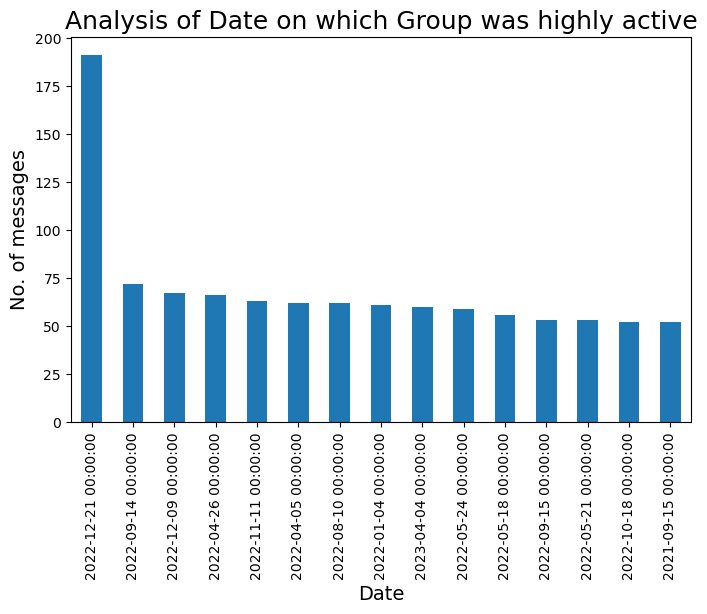

In [72]:
plt.figure(figsize=(8,5))
df['Date'].value_counts().head(15).plot.bar()
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of Date on which Group was highly active',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()